Set up a Bloch sphere in the basis $\{|E_0\rangle, |E_1\rangle\}$ and consider $\alpha_0(t=0) = \alpha_1(t=0) = \frac{1}{\sqrt{2}}$. Show the qubit state at $t=0$ and mark its time-evolution.

In [2]:
import os
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import qutip
import scipy
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [3]:
def animate_bloch(states, eig_states, name, duration=0.1, save_all=False):

    b = qutip.Bloch()
    b.vector_color = ["r"]
    # b.view = [-40,30]
    images = []

    try:
        length = len(states)
    except:
        length = 1
        states = [states]
        
    b.point_marker = ["o"]
    b.point_size = [25]

    for i in range(length):
        b.clear()
        b.add_states(eig_states)
        b.add_states(states[i])
        b.add_states(states[: (i + 1)], "point")
        if save_all:
            b.save(dirc="sphere")  # saving images to tmp directory
            filename = "sphere/bloch_%01d.png" % i
        else:
            filename = "temp_file.png"
            b.save(filename)
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f"{name}.gif", images, duration=duration)

In [4]:
ket_E0 = qutip.basis(2, 0)  # |0>
ket_E1 = qutip.basis(2, 1)  # |1>
E0 = 1
E1 = -1
bloch_states = []
init_state = (ket_E0 + ket_E1) / np.sqrt(2)

bloch_states = [init_state]

# generate and store states for alpha
for t in np.linspace(0.0, 10 * np.pi, 200):
    coeff = np.exp(-1j * (E1 - E0) * t / scipy.constants.hbar)
    psi = ket_E0 + coeff * ket_E1
    psi = psi / psi.norm()
    bloch_states.append(psi)

In [5]:
animate_bloch(bloch_states, [ket_E0, ket_E1], "exercise_4")
# if it takes time, reduce the `stop` or `num` in np.linspace

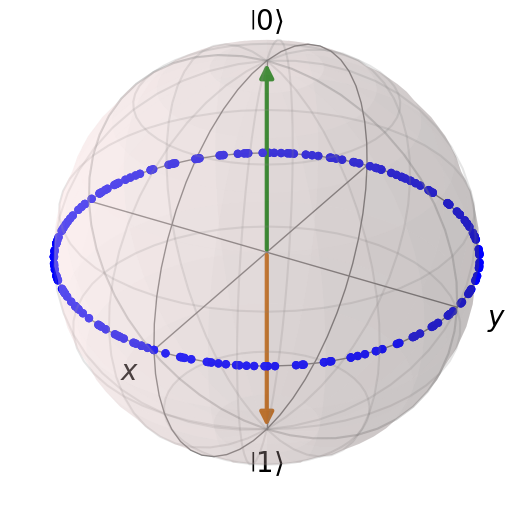

In [6]:
b = qutip.Bloch()
b.point_color = "blue"
b.point_marker = ["o"]
b.point_size = [25]
b.add_states([ket_E0, ket_E1])
b.add_states(bloch_states, "point")
b.show()

The animated bloch sphere can be found [here](https://github.com/Gopal-Dahale/qmnp/tree/main/hw1/p2#exercise-4). The axis lies in the X-Y plane.

<div align="center">
<img width="400" src="exercise_4.gif" /><br>
</div>